<a href="https://colab.research.google.com/github/duckbillLvr/software-lecture/blob/main/lecture3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install finterstellar

     |████████████████████████████████| 109 kB 2.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [35]:
import finterstellar as fs

1. 핀터스텔라 라이브러리의 fn_single함수를 이용하여 코스트코의 재무제표를 불러온다.

In [36]:
df = fs.fn_single(otp='16474954571099712210', symbol='COST', window='T') # symbol: 데이터 산출 기준, window: 분기데이터=Q, 분기별을 합쳐서 1년치 트레일링 데이터 호출=T
df.tail(3)

,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,Shares,...,Long Term Liabilities,Total Liabilities,Shareholders Equity,Depreciation,Operating Cash Flow,Capital Expenditure,Investing cash flow,Dividends,Financing cash flow,Price
2021-08-31,"197,998,000,000.00","172,641,000,000.00","25,357,000,000.00","18,273,000,000.00","5,278,000,000.00","5,061,000,000.00",11.42,"8,852,000,000.00","5,278,000,000.00","443,089,000.00",...,"11,749,000,000.00","41,190,000,000.00","18,078,000,000.00","2,002,000,000.00","9,644,000,000.00","-2,695,000,000.00","-4,196,000,000.00","-5,438,000,000.00","-6,207,000,000.00",455.49
2021-11-30,"203,592,000,000.00","177,515,000,000.00","26,077,000,000.00","18,640,000,000.00","5,631,000,000.00","5,434,000,000.00",12.26,"9,221,000,000.00","5,631,000,000.00","443,377,000.00",...,"11,807,000,000.00","45,149,000,000.00","19,000,000,000.00","2,029,000,000.00","12,864,000,000.00","-3,177,000,000.00","-4,753,000,000.00","-1,358,000,000.00","-2,396,000,000.00",539.38
2022-02-28,"210,219,000,000.00","183,617,000,000.00","26,602,000,000.00","19,083,000,000.00","7,443,000,000.00","5,513,000,000.00",12.44,"9,272,000,000.00","7,443,000,000.00","443,623,000.00",...,"11,557,000,000.00","43,102,000,000.00","19,976,000,000.00","2,071,000,000.00","9,932,000,000.00","-3,900,000,000.00","-3,891,000,000.00","-1,358,000,000.00","-2,805,000,000.00",519.25


2. 가져온 데이터를 확인한다. (columns 파라미터 사용)

In [37]:
df.columns

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

3. PER를 계산하고 코스트코의 PER추이를 차트로 계산
- PER = Price / EPS

In [39]:
df['PER'] = df['Price'] / df['EPS']

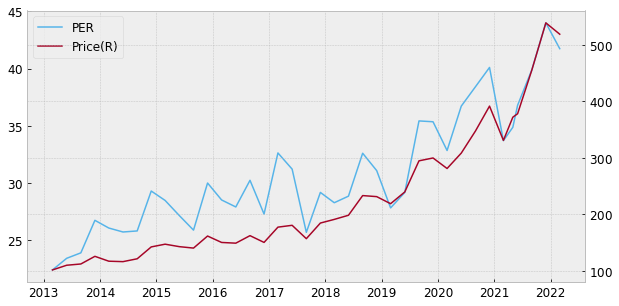

In [40]:
fs.draw_chart(df, left='PER', right='Price')

In [41]:
df.columns # PER항목이 생긴것을 확인 할수 있다.

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price',
       'PER'],
      dtype='object')

4. 밴드차트를 그려본다.
- PER와 같이 재무지표와 가격이 결합된 지표를 주가배수(Price Multiple)이라고 한다.

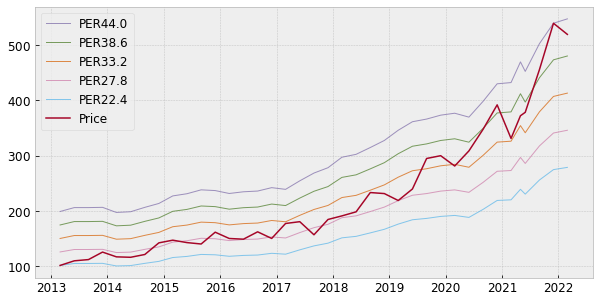

In [42]:
fs.draw_price_multiple_band(df, multiple='PER', acct='EPS')

5. 전체 상장 종목의 재무정보 데이터 불러오기

- 이익 대비 저평가 종목 : PER를 이용해 투자를 하는 가장 직관적인 방법은 PER가 낮은 종목을 사서 기다리는 것이다.

- fn_consolidated() 함수를 이용하면 여러 기업의 재무 정보를 모아서 분기별로 조회할 수 있다.

In [43]:
df = fs.fn_consolidated(otp='16474954571099712210', term='2020Q3', vol=100000, study='Y') # term: 조회 대상 분기 값, vol: 일평균 거래량
df.head(3)

2020Q3... For Study. Freezed at the end of July 2021. OK


,term,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,...,Financing Cash Flow,Price,Price_M1,Price_M2,Price_M3,name,name_kr,sector,industry,avg_volume
symbol,,,,,,,,,,,,,,,,,,,,,
A,2020Q3,"5,223.00","2,437.00","2,786.00","1,494.00",797.00,691.00,2.26,"1,105.00",797.00,...,49.00,100.94,102.09,116.90,118.49,Agilent Technologies Inc,애질런트 테크놀로지스,Healthcare,Diagnostics & Research,1362200
AA,2020Q3,"9,330.00","8,043.00","1,287.00",213.00,-23.00,-469.00,-2.53,643.00,-23.00,...,484.00,11.63,12.92,19.90,23.05,Alcoa Corp,알코아,Basic Materials,Aluminum,5513100
AAIC,2020Q3,64.77,0.00,64.77,12.56,11.16,-54.80,-1.52,62.76,52.21,...,"-3,220.76",2.84,2.46,3.21,3.78,Arlington Asset Investment Corp Class A,알링턴 에셋 인베스트먼트 Class A,Real Estate,Reit Mortgage,166900


In [44]:
df.columns

Index(['term', 'Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing Cash Flow', 'Dividend', 'Financing Cash Flow', 'Price',
       'Price_M1', 'Price_M2', 'Price_M3', 'name', 'name_kr', 'sector',
       'industry', 'avg_volume'],
      dtype='object')